In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv('Books.csv',low_memory=False)
users=pd.read_csv('users.csv')
ratings=pd.read_csv('rating.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [5]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1048575, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

72

In [13]:
books.sample(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
81452,609803425,Buffy Chronicles : The Unofficial Companion t...,Ngaire Genge,1998,Three Rivers Press (CA),http://images.amazon.com/images/P/0609803425.0...,http://images.amazon.com/images/P/0609803425.0...,http://images.amazon.com/images/P/0609803425.0...
77102,805054960,Rough Treatment,John Harvey,1997,Owl Publishing Company,http://images.amazon.com/images/P/0805054960.0...,http://images.amazon.com/images/P/0805054960.0...,http://images.amazon.com/images/P/0805054960.0...
121604,1551666146,Glamour Puss (Mira),R. J. Kaiser,2000,Mira Books,http://images.amazon.com/images/P/1551666146.0...,http://images.amazon.com/images/P/1551666146.0...,http://images.amazon.com/images/P/1551666146.0...
102377,1558537430,If Rednecks Had Been The Chosen People,Charlie Thompson,1999,Rutledge Hill Press,http://images.amazon.com/images/P/1558537430.0...,http://images.amazon.com/images/P/1558537430.0...,http://images.amazon.com/images/P/1558537430.0...
148146,038549291X,Inside the Animal Mind,George Page,1999,Doubleday Books,http://images.amazon.com/images/P/038549291X.0...,http://images.amazon.com/images/P/038549291X.0...,http://images.amazon.com/images/P/038549291X.0...
30338,60165936,Dracula Unbound,Brian Wilson Aldiss,1991,Harpercollins,http://images.amazon.com/images/P/0060165936.0...,http://images.amazon.com/images/P/0060165936.0...,http://images.amazon.com/images/P/0060165936.0...
4125,688042872,The Dinosaur Heresies: New Theories Unlocking ...,Robert T. Bakker,1986,William Morrow &amp; Company,http://images.amazon.com/images/P/0688042872.0...,http://images.amazon.com/images/P/0688042872.0...,http://images.amazon.com/images/P/0688042872.0...
243206,188300229X,Texas Rodeo Showdown (Hannah's Island),Eric Wiggin,1998,Emerald Books,http://images.amazon.com/images/P/188300229X.0...,http://images.amazon.com/images/P/188300229X.0...,http://images.amazon.com/images/P/188300229X.0...
249259,2070715116,Les NaufragÃ?Â©s et les RescapÃ?Â©s : Quarante...,Primo Levi,1989,Gallimard,http://images.amazon.com/images/P/2070715116.0...,http://images.amazon.com/images/P/2070715116.0...,http://images.amazon.com/images/P/2070715116.0...
146862,812926234,The Whartons' Stretch Book: Featuring the Brea...,Jim Wharton,1996,Three Rivers Press (CA),http://images.amazon.com/images/P/0812926234.0...,http://images.amazon.com/images/P/0812926234.0...,http://images.amazon.com/images/P/0812926234.0...


In [14]:
books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [15]:
books['Year-Of-Publication'].value_counts()	

Year-Of-Publication
2002    17627
1999    17431
2001    17359
2000    17232
1998    15766
        ...  
2038        1
1910        1
1914        1
1904        1
2037        1
Name: count, Length: 118, dtype: int64

In [16]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [17]:
books[(books['Year-Of-Publication'].isin(['Gallimard']))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [18]:
books=books[~(books['Year-Of-Publication'].isin(['Gallimard','DK Publishing Inc']))]

In [19]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', '1909', '2008', '1378', '1919', '1922',
       '1

In [20]:
#users['Age']=users['Age'].astype('int')

<Axes: >

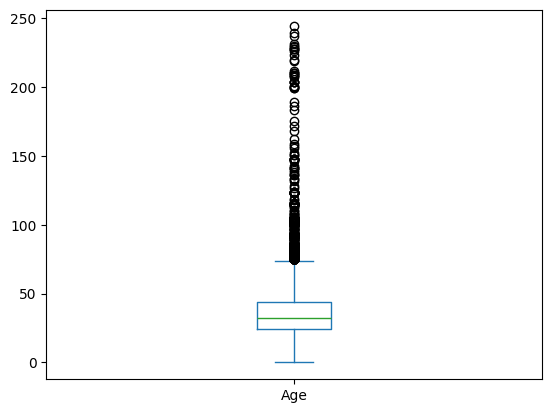

In [21]:
users['Age'].plot(kind='box')

In [22]:
users['Age'].max()

244.0

In [23]:
new_df=ratings.merge(books,on='ISBN')

In [24]:
count=new_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
count.rename(columns={'Book-Rating':'num-rating'},inplace=True)

In [25]:
count

,Book-Title,num-rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230212,Ã?Â?l- Connection.,1
230213,Ã?Â?lpiraten.,2
230214,Ã?Â?rger mit Produkt X. Roman.,4
230215,Ã?Â?stlich der Berge.,2


In [26]:
avg=new_df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg.rename(columns={'Book-Rating':'avg-rating'},inplace=True)

In [27]:
avg

,Book-Title,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230212,Ã?Â?l- Connection.,0.00
230213,Ã?Â?lpiraten.,0.00
230214,Ã?Â?rger mit Produkt X. Roman.,5.25
230215,Ã?Â?stlich der Berge.,4.00


In [28]:
count_avg=count.merge(avg,on='Book-Title')
count_avg

,Book-Title,num-rating,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230212,Ã?Â?l- Connection.,1,0.00
230213,Ã?Â?lpiraten.,2,0.00
230214,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230215,Ã?Â?stlich der Berge.,2,4.00


In [29]:
pop_books=count_avg[(count_avg['num-rating']>=250)].sort_values('avg-rating',ascending=False).head(50)


In [30]:
pop_books=pop_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','num-rating','avg-rating','Publisher']]

In [31]:
new_df.sample(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
668254,180860,345308530,5,Tidal Wave,Roberta Latow,1983,Ballantine Books,http://images.amazon.com/images/P/0345308530.0...,http://images.amazon.com/images/P/0345308530.0...,http://images.amazon.com/images/P/0345308530.0...
459476,124487,345386132,9,Eyes of a Child,Richard North Patterson,1996,Ballantine Books,http://images.amazon.com/images/P/0345386132.0...,http://images.amazon.com/images/P/0345386132.0...,http://images.amazon.com/images/P/0345386132.0...
157621,38034,446524565,6,Swell : A Girl's Guide to the Good Life,Ilene Rosenzweig,1999,Warner Books,http://images.amazon.com/images/P/0446524565.0...,http://images.amazon.com/images/P/0446524565.0...,http://images.amazon.com/images/P/0446524565.0...


In [32]:
d1=new_df.groupby('User-ID')['Book-Rating'].count()>200
k_users=d1[d1].index
k_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       249111, 249628, 249862, 249894, 250184, 250405, 250764, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=737)

In [33]:
filter_data=new_df[(new_df['User-ID'].isin(k_users))]
filter_data


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1153,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1154,277427,26217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1155,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1156,277427,30615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1157,277427,60002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
941103,250764,451410777,0,Sleep Tight (Onyx Book),Anne Frasier,2003,Onyx Books,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...,http://images.amazon.com/images/P/0451410777.0...
941104,250764,452264464,8,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
941105,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941106,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [34]:
d2=filter_data.groupby('Book-Title')['Book-Rating'].count()>=50
k_books=d2[d2].index

In [35]:
final_data=filter_data[filter_data['Book-Title'].isin(k_books)]

In [36]:
final_data.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1153,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1166,277427,60930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1168,277427,60934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1171,277427,61009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1177,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
941061,250764,446364673,0,The Gift,Kirk Douglas,1993,Warner Books,http://images.amazon.com/images/P/0446364673.0...,http://images.amazon.com/images/P/0446364673.0...,http://images.amazon.com/images/P/0446364673.0...
941082,250764,449907481,0,A Thousand Acres (Ballantine Reader's Circle),JANE SMILEY,1992,Ballantine Books,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...
941089,250764,451180410,0,Mortal Fear,Greg Iles,1998,Signet Book,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...
941091,250764,451191013,0,The Regulators,Stephen King,2002,Signet Book,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...


In [37]:
pt=final_data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [38]:
pt.fillna(0,inplace=True)

In [39]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
sim_score=cosine_similarity(pt)

In [42]:
np.where(pt.index=='4 Blondes')[0][0]


3

In [43]:
temp=books[books['Book-Title']==pt.index[1]]
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1863,446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4131,316666009,1st to Die: A Novel,James Patterson,2001,Little Brown and Company,http://images.amazon.com/images/P/0316666009.0...,http://images.amazon.com/images/P/0316666009.0...,http://images.amazon.com/images/P/0316666009.0...


In [44]:
pt.index[22]

'A Walk to Remember'

In [45]:
sorted(list(enumerate(sim_score[4])),key=lambda x:x[1],reverse=True)[1:6]

[(22, 0.31526410397957094),
 (477, 0.29747090627308975),
 (103, 0.2672180514271652),
 (352, 0.26524765789168525),
 (297, 0.2643819469695834)]

In [46]:
def recommend(book_name):
    idx=np.where(pt.index==book_name)[0][0]
    similar=sorted(list(enumerate(sim_score[idx])),key=lambda x:x[1],reverse=True)[1:5]
    data=[]
    for i in similar:
        item=[]
        temp=final_data[final_data['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Publisher'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Book-Rating'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Year-Of-Publication'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
    return data

In [47]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'Signet',
  8,
  '2004',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'Perennial',
  9,
  '1998',
  'http://images.amazon.com/images/P/0060929871.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'Ballantine Books',
  0,
  '1986',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'Fawcett Books',
  0,
  '1989',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg']]

In [48]:
import pickle
pickle.dump(pop_books,open('popular.pkl','wb'))

In [49]:
pop_books.shape

(50, 7)

In [50]:
pickle.dump(pt,open('pt.pkl','wb'))

In [51]:
pickle.dump(books,open('books.pkl','wb'))

In [52]:
pickle.dump(sim_score,open('sim_score.pkl','wb'))